In [49]:
import math
from PIL import Image, ImageEnhance, ImageFilter
from skimage.exposure import cumulative_distribution
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import cv2

### Histogram visualization and Calculation of properties:

In [50]:
def plot_hist(img):
    plt.hist(np.array(img).ravel(), bins=500)
    plt.ylabel('frequency')
    plt.xlabel('intensity')
    plt.show()

In [57]:
# calculation of entropy
def entropy2(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    base = e if base is None else base
    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()#log(a) b=log (c) b÷log (c) a

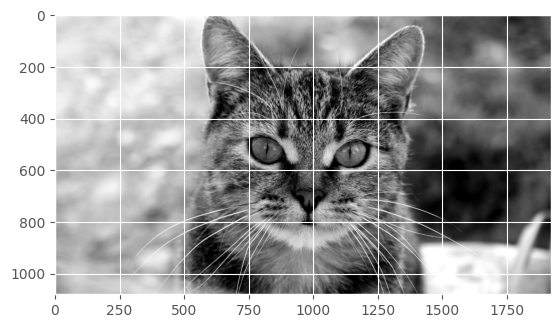

In [54]:
plt.imshow(image, cmap='gray')

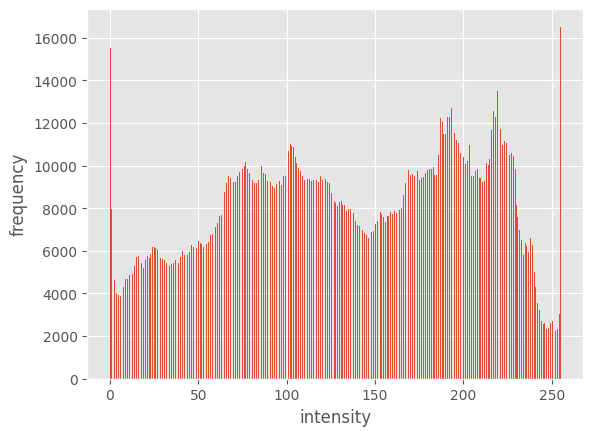

mean of image is 133.221, std is 68.355, entropy is 7.928


In [51]:
# Load an image in grayscale
image = cv2.imread('cat.jpg', cv2.IMREAD_GRAYSCALE)
plot_hist(image)
mean_value = image.mean()
std_value = image.std()
entropy = entropy2(image, base=2)
print(f'mean of image is {round(mean_value, 3)}, std is {round(std_value, 3)}, entropy is {round(entropy, 3)}')

### thresholding

In [31]:
def plot_image(image, title=''):
    pylab.title(title, size=12), pylab.imshow(image, cmap='gray')
    pylab.axis('off') # comment this line if you want axis ticks
    
def thresholding(thresholds, img):
    plt.figure(figsize=(20,20))
    imgs = []
    for i in range(len(thresholds)):
        im1 = img.point(lambda x: x > th[i])
        imgs.append(im1)
        pylab.subplot(len(thresholds),1,i+1), plot_image(im1, 'binary image with threshold=' + str(th[i]))
    pylab.show()
    return imgs

In [32]:
# cat_img = cv2.imread('cat.jpg')
cat_img = Image.open('cat.jpg').convert('L')

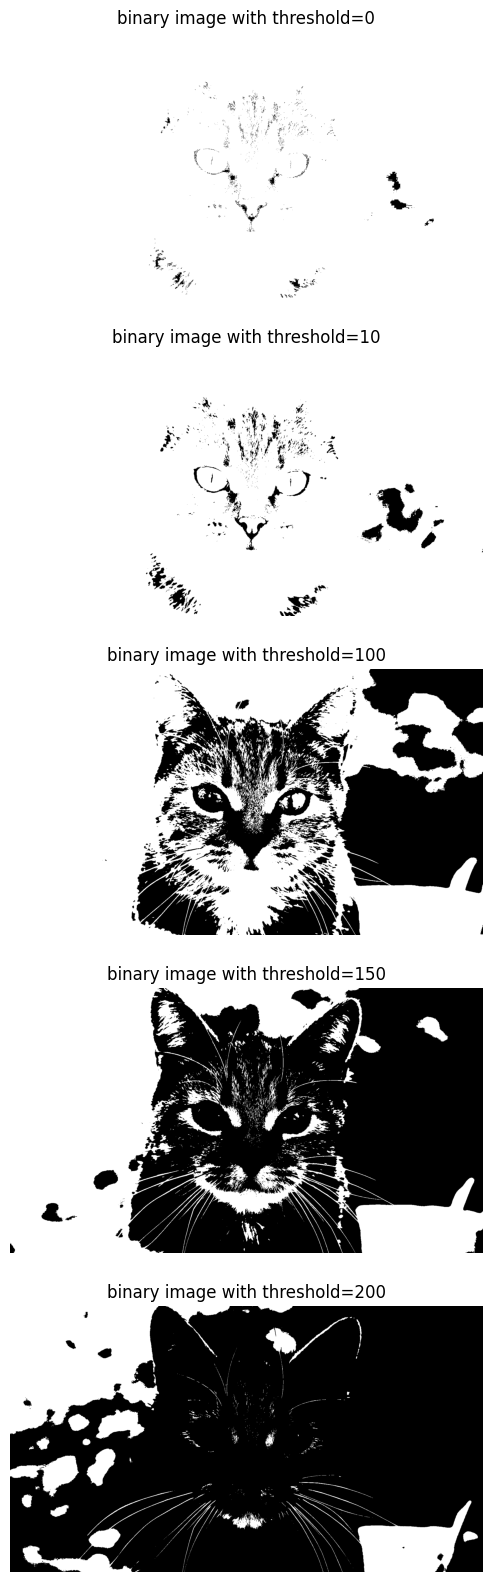

In [33]:
th = [0, 10, 100, 150, 200]
imgs = thresholding(th, cat_img)

### half-toning and denoising:

In [55]:
# adding of half-toning
im = Image.open('cat.jpg').convert('L')
im_noise = Image.fromarray(np.clip(im + np.random.randint(-128, 128, (im.height, im.width)), 0, 255).astype(np.uint8))

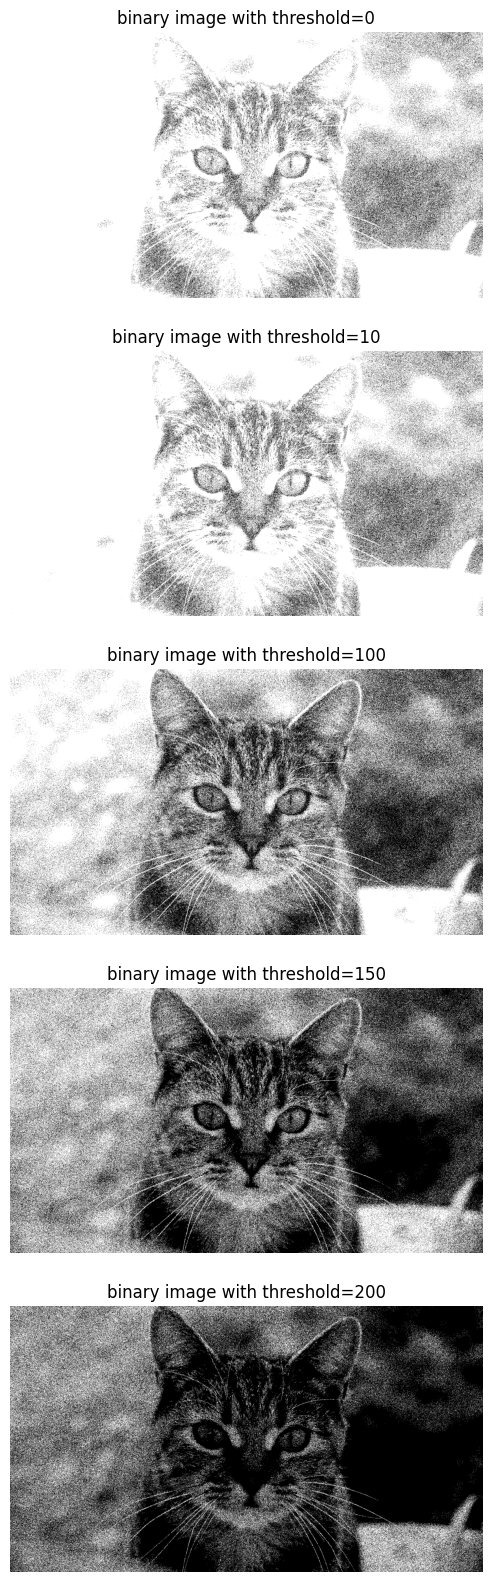

In [35]:
imgs_cat_noise = thresholding(th, im_noise)

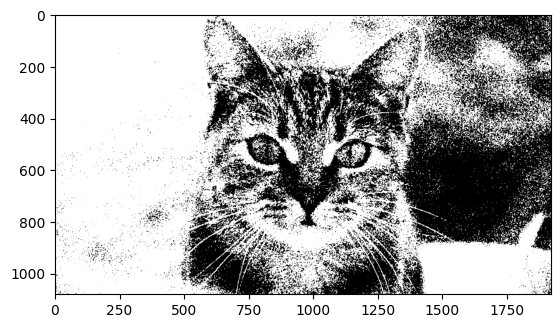

In [136]:
# применение GaussianBlur denoising на half-toning изображении
plt.imshow(np.array(imgs_cat_noise[2].filter(ImageFilter.GaussianBlur(2))), cmap='gray')

In [141]:
# применение non-local means denoising на half-toning изображении
sigma_est = np.mean(estimate_sigma(np.array(imgs_cat_noise[2]), multichannel=False))
patch_kw = dict(patch_size=5, # 5x5 patches
patch_distance=6, # 13x13 search area
multichannel=False)
denoise = denoise_nl_means(np.array(imgs_cat_noise[3]), h=1.15 * sigma_est, fast_mode=False, **patch_kw)

/tmp/ipykernel_17264/3075378433.py:2: FutureWarning: `multichannel` is a deprecated argument name for `estimate_sigma`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sigma_est = np.mean(estimate_sigma(np.array(imgs_cat_noise[2]), multichannel=False))
/tmp/ipykernel_17264/3075378433.py:6: FutureWarning: `multichannel` is a deprecated argument name for `denoise_nl_means`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoise = denoise_nl_means(np.array(imgs_cat_noise[3]), h=1.15 * sigma_est, fast_mode=False, **patch_kw)


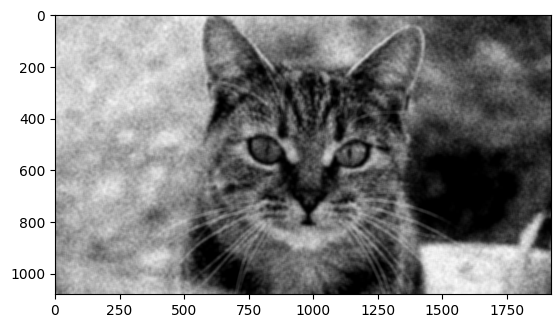

In [142]:
plt.imshow(denoise, cmap='gray')

### Histogram processing

In [40]:
im1 = Image.open('cat2.jpg').convert('L')

In [42]:
def plot_img_and_hist(img, img_name=''):
    pylab.style.use('ggplot')
    pylab.figure(figsize=(15,5))
    pylab.subplot(121), pylab.imshow(img, cmap='gray'), pylab.title(img_name, size=18)
    pylab.subplot(122), plot_hist(img),# pylab.yscale('log',basey=10)
    pylab.show()

In [43]:
# contrast stretching via PIL.ImageEnhance
contrast = ImageEnhance.Contrast(im1)
im_contr_str = np.reshape(np.array(contrast.enhance(2).getdata()).astype(np.uint8), (im1.height, im1.width)) 

In [281]:
# histogram equalization
img = np.array(im1)
img_eq = exposure.equalize_hist(img)

/home/b_gainitdinov/anaconda3/lib/python3.9/site-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


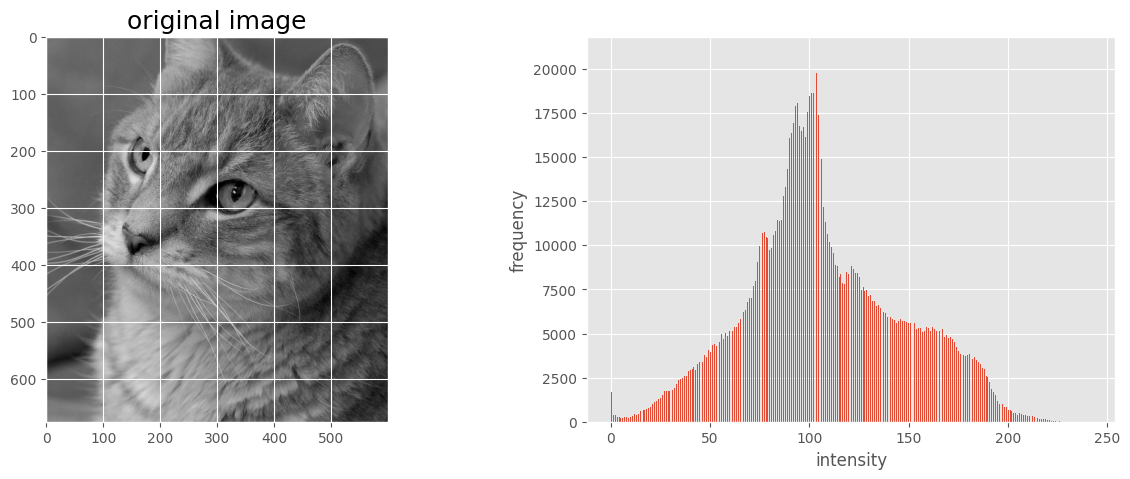

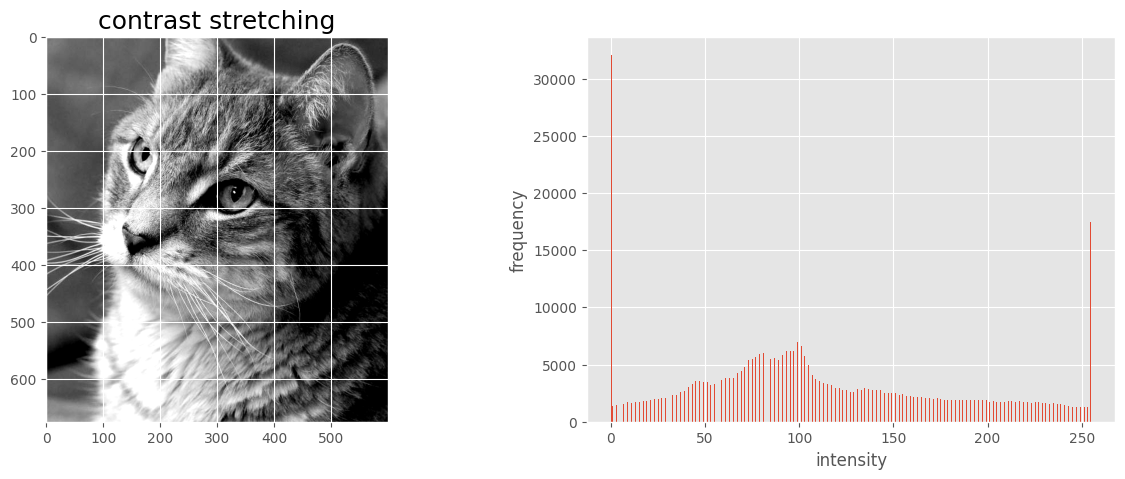

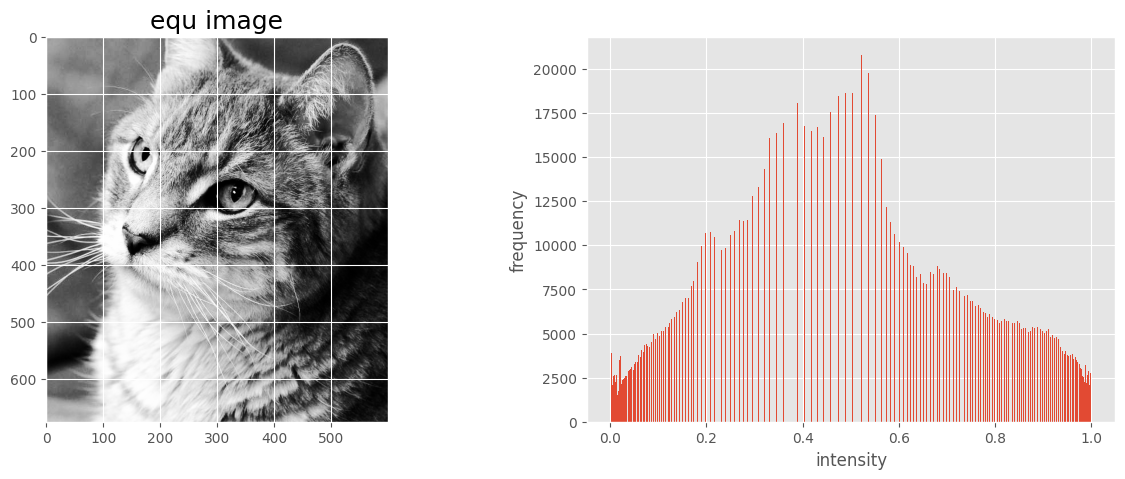

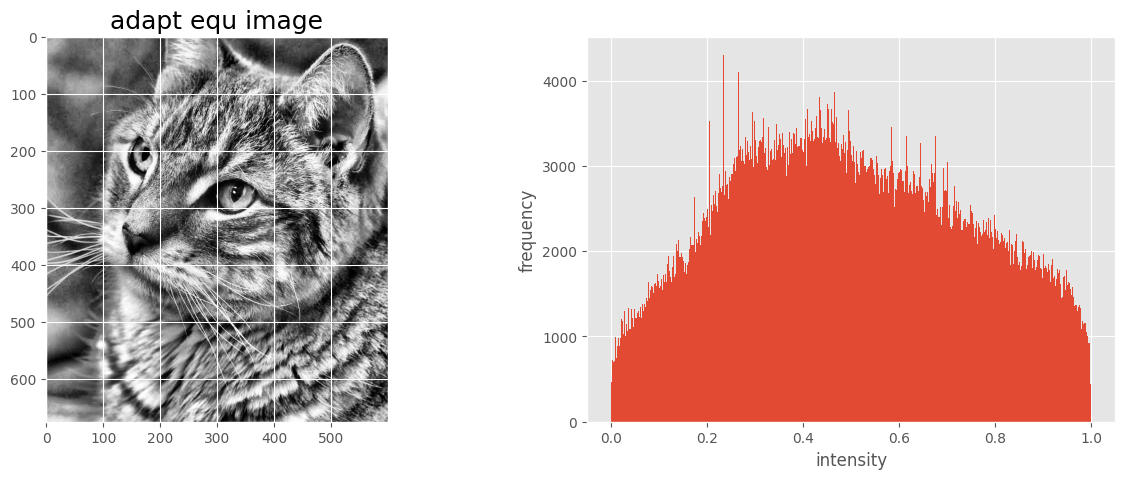

In [282]:
plot_img_and_hist(im1, 'original image')
plot_img_and_hist(im_contr_str, 'contrast stretching')
plot_img_and_hist(img_eq, 'equ image')
# plot_img_and_hist(img_adapteq, 'adapt equ image')